# Web Scraping with Beautiful Soup - Lab

## Introduction

Now that you've read and seen some docmentation regarding the use of Beautiful Soup, its time to practice and put that to work! In this lab you'll formalize some of our example code into functions and scrape the lyrics from an artist of your choice.

## Objectives
You will be able to:
* Scrape Static webpages
* Select specific elements from the DOM

## Link Scraping

Write a function to collect the links to each of the song pages from a given artist page.

In [5]:
from bs4 import BeautifulSoup
import requests

def grab_song_links(artist_page_url):

    url = artist_page_url

    html_page = requests.get(url) #Make a get request to retrieve the page
    soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing


    #The example from our lecture/reading
    data = [] #Create a storage container

    #Get album divs
    albums = soup.find_all("div", class_="album")
    for album_n in range(len(albums)):
        #On the last album, we won't be able to look forward
        if album_n == len(albums)-1:
            cur_album = albums[album_n]
            album_songs = cur_album.findNextSiblings('a')
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
        else:
            cur_album = albums[album_n]
            next_album = albums[album_n+1]
            saca = cur_album.findNextSiblings('a') #songs after current album
            sbna = next_album.findPreviousSiblings('a') #songs before next album
            album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
    return data

## Text Scraping
Write a secondary function that scrapes the lyrics for each song page.

In [6]:
#Remember to open up the webpage in a browser and control-click/right-click and go to inspect!
from bs4 import BeautifulSoup
import requests

#Example page
url = 'https://www.azlyrics.com/lyrics/lilyallen/sheezus.html'


html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')
soup.prettify()[:1000]

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="Lyrics to &quot;Sheezus&quot; song by Lily Allen: Been here before, so I\'m prepared Not gonna lie though, I\'m kinda scared Lace up my gloves, I\'m goin..." name="description"/>\n  <meta content="Sheezus lyrics, Lily Allen Sheezus lyrics, Lily Allen lyrics" name="keywords"/>\n  <meta content="noarchive" name="robots"/>\n  <meta content="//www.azlyrics.com/az_logo_tr.png" property="og:image"/>\n  <title>\n   Lily Allen - Sheezus Lyrics | AZLyrics.com\n  </title>\n  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>\n  <link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>\n  <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->\n  <!--[if lt IE 9]>\r\n<script src="https://oss.maxcdn

In [7]:
divs = soup.findAll('div')

In [8]:
div = divs[0]

In [9]:
for n, div in enumerate(divs):
    if "<!-- Usage of azlyrics.com content by any " in div.text:
        print(n)

In [10]:
main_page = soup.find('div', {"class": "container main-page"})
main_l2 = main_page.find('div', {"class" : "row"})
main_l3 = main_l2.find('div', {"class" : "col-xs-12 col-lg-8 text-center"})

In [11]:
lyrics = main_l3.findAll('div')[6].text
lyrics

"\n\r\nBeen here before, so I'm prepared\nNot gonna lie though, I'm kinda scared\nLace up my gloves, I'm going in\nDon't let my kids watch me when I get in the ring\n\nI'll take the hits, roll with the punches\nI'll get back up, it's not as if I've never done this\nBut then again, the game is changing\nCan't just come back, jump on the mic and do the same thing\n\nThere goes the bell, I know that sound\nI guess it's time for me to go another round\nNow wish me luck, I'm gonna need it\nI'll see you on the other side, if I'm still breathing\n\nRiri isn't scared of Katy Perry's roaring\nQueen B's gone back to the drawing\nLorde smells blood, yeah, she's about to slay you\nKid ain't one to fuck with when she's only on her debut\n\nWe're all watching Gaga, L-O-L like ha ha\nDying for the art, so really she's a martyr\nThe second best will never cut it for the divas\nGive me that crown, bitch, I wanna be Sheezus\n\nI'm ready for all the comparisons\nI think it's dumb and it's embarrassing\nI

In [12]:
def scrape_lyrics(song_page_url):
    html_page = requests.get(song_page_url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    main_page = soup.find('div', {"class": "container main-page"})
    main_l2 = main_page.find('div', {"class" : "row"})
    main_l3 = main_l2.find('div', {"class" : "col-xs-12 col-lg-8 text-center"})
    lyrics = main_l3.findAll('div')[6].text
    return lyrics

## Synthesizing
Create a script using your two functions above to scrape all of the song lyrics for a given artist.


In [13]:
#Preview First Step
songs = grab_song_links("https://www.azlyrics.com/g/gomez.html")
print(len(songs))
print(songs[0])

106
('Get Miles', '../lyrics/gomez/getmiles.html', 'album: "Bring It On" (1998)')


In [14]:
songs = grab_song_links("https://www.azlyrics.com/g/gomez.html")
url_base = "https://www.azlyrics.com"
lyrics = []
for song in songs:
    try:
        url_sffx = song[1].replace('..','')
        url = url_base + url_sffx
        lyr = scrape_lyrics(url)
        lyrics.append(lyr)
    except:
        lyrics.append("N/A")

In [15]:
print(len(songs), len(lyrics))

106 106


In [16]:
import pandas as pd
df = pd.DataFrame(list(zip(songs, lyrics)))
df.head()

,0,1
0,"(Get Miles, ../lyrics/gomez/getmiles.html, alb...",\n\r\nI love this island but this island's kil...
1,"(Whippin' Piccadilly, ../lyrics/gomez/whippinp...","\n\r\nOnce upon a time, not too long ago\nWe t..."
2,"(Make No Sound, ../lyrics/gomez/makenosound.ht...","\n\r\nHe's fine, don't make no sound\nHe's fin..."
3,"(78 Stone Wobble, ../lyrics/gomez/78stonewobbl...",\n\r\nI was always told that you have to have ...
4,"(Tijuana Lady, ../lyrics/gomez/tijuanalady.htm...",\n\r\nTake me down\nTo where you hide\nLay me ...


In [17]:
df['Song_Name'] = df[0].map(lambda x: x[0])
df['Song_URL_SFFX'] = df[0].map(lambda x: x[1])
df['Album_Name'] = df[0].map(lambda x: x[2])
df = df.rename(columns={1:'Lyrics'})
df.head()

,0,Lyrics,Song_Name,Song_URL_SFFX,Album_Name
0,"(Get Miles, ../lyrics/gomez/getmiles.html, alb...",\n\r\nI love this island but this island's kil...,Get Miles,../lyrics/gomez/getmiles.html,"album: ""Bring It On"" (1998)"
1,"(Whippin' Piccadilly, ../lyrics/gomez/whippinp...","\n\r\nOnce upon a time, not too long ago\nWe t...",Whippin' Piccadilly,../lyrics/gomez/whippinpiccadilly.html,"album: ""Bring It On"" (1998)"
2,"(Make No Sound, ../lyrics/gomez/makenosound.ht...","\n\r\nHe's fine, don't make no sound\nHe's fin...",Make No Sound,../lyrics/gomez/makenosound.html,"album: ""Bring It On"" (1998)"
3,"(78 Stone Wobble, ../lyrics/gomez/78stonewobbl...",\n\r\nI was always told that you have to have ...,78 Stone Wobble,../lyrics/gomez/78stonewobble.html,"album: ""Bring It On"" (1998)"
4,"(Tijuana Lady, ../lyrics/gomez/tijuanalady.htm...",\n\r\nTake me down\nTo where you hide\nLay me ...,Tijuana Lady,../lyrics/gomez/tijuanalady.html,"album: ""Bring It On"" (1998)"


## Visualizing
Generate two bar graphs to compare lyrical changes for the artist of your chose. For example, the two bar charts could compare the lyrics for two different songs or two different albums.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [19]:
pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:10]

miles    12
this     11
I         9
get       9
away      7
away,     6
me        6
piece     6
gonna     6
Get       6
dtype: int64

Text(0.5, 1.0, "Top 10 Lyrics for Whippin' Piccadilly")

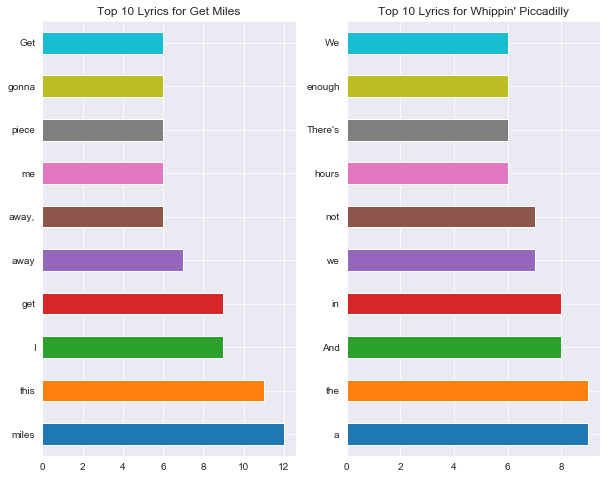

In [20]:
fig, axes = plt.subplots(1,2, figsize=(10,8))
#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:10]
#Plot as bar graph
top10.plot(ax=axes[0], kind='barh')
#Add Subplot Title
axes[0].set_title('Top 10 Lyrics for {}'.format(df['Song_Name'].iloc[0]))
#Repeat
#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[1].split()).value_counts()[:10]
#Plot as bar graph
top10.plot(ax=axes[1], kind='barh')
#Add Subplot Title
axes[1].set_title('Top 10 Lyrics for {}'.format(df['Song_Name'].iloc[1]))

## Level - Up

Think about how you structured the data from your web scraper. Did you scrape the entire song lyrics verbatim? Did you simply store the words and their frequency counts, or did you do something else entirely? List out a few different options for how you could have stored this data. What are advantages and disadvantages of each? Be specific and think about what sort of analyses each representation would lend itself to.

In [ ]:
#Use this block for your code!

## Summary

Congratulations! You've now practiced your Beautiful Soup knowledge!